In [1]:
print("starting script")
import requests
import json
import pandas as pd
from random import randint
import time
print("loaded modules")

starting script
loading modules


In [81]:
df = pd.DataFrame()

In [82]:
# enter symbol to look up
ETFlist = ['VOO','EWC', 'EWJ', 'MCHI', 'EWZ', 'EWU', 'EWG', 'INDA', 'EWQ', 'EWP']

# set time stamps for period to look at
per1 = 1388563200  # 1/1/2014
per2 = 1669852800  # 12/1/2022

In [83]:
# loop to fetch stock data
for ticker in ETFlist:

	headers = {'User-Agent': 'Opera/9.80 (Windows NT 6.1; Win64; x64; Edition Next) Presto/2.12.388 Version/12.15'}
	print("%s" % (ticker))
	time.sleep(randint(1, 3))

	# retrieve attributes
	other_details_json_link = "https://query2.finance.yahoo.com/v8/finance/chart/{0}?period1={1}&period2={2}&interval=1mo&events=history".format(ticker, per1, per2)   
	summary_json_response = requests.get(other_details_json_link, headers=headers)

	try:
		json_loaded_summary = json.loads(summary_json_response.text)
		# pull out stock price from attributes
		timestamps = json_loaded_summary["chart"]["result"][0]['timestamp']
		prices = json_loaded_summary["chart"]["result"][0]['indicators']['quote'][0]['open']
    

	except:
		prices = []
		timestamps = []

	# add stock price pulled to dataframe
	df1 = pd.DataFrame({ticker: prices}, index=timestamps)
	df = pd.concat([df, df1], axis=1)

VOO
EWC
EWJ
MCHI
EWZ
EWU
EWG
INDA
EWQ
EWP


In [84]:
df.index = pd.to_datetime(df.index, unit='s')
df

,VOO,EWC,EWJ,MCHI,EWZ,EWU,EWG,INDA,EWQ,EWP
2014-01-01 05:00:00,168.529999,29.120001,48.320000,47.730000,43.639999,41.459999,31.000000,24.379999,27.889999,37.619999
2014-02-01 05:00:00,163.020004,28.160000,45.000000,43.830002,39.259998,39.680000,29.809999,23.250000,26.900000,37.700001
2014-03-01 05:00:00,169.190002,29.030001,45.480000,44.830002,40.290001,41.900002,30.889999,24.190001,28.490000,38.939999
2014-04-01 04:00:00,171.869995,29.559999,45.279999,45.470001,45.270000,41.380001,31.600000,26.730000,29.469999,41.480000
2014-05-01 04:00:00,172.500000,30.469999,44.799999,43.889999,46.799999,43.139999,31.620001,26.440001,30.090000,42.060001
...,...,...,...,...,...,...,...,...,...,...
2022-07-01 04:00:00,346.160004,33.630001,52.340000,55.610001,26.799999,29.420000,22.700001,39.160000,29.660000,23.170000
2022-08-01 04:00:00,376.119995,35.060001,56.680000,49.139999,28.750000,30.990000,23.559999,42.820000,31.860001,22.760000
2022-09-01 04:00:00,361.100006,33.410000,52.959999,49.150002,30.600000,28.410000,21.440001,43.220001,29.100000,21.660000
2022-10-01 04:00:00,331.790009,31.320000,49.310001,42.590000,31.520000,26.590000,19.959999,40.740002,27.070000,20.139999


In [85]:
df2 = df.divide(df.iloc[0] / 100)

<AxesSubplot: >

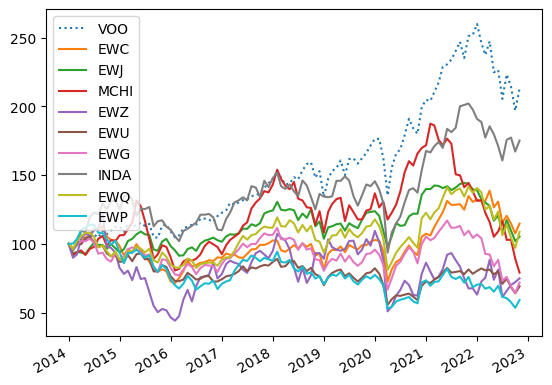

In [86]:
df2.plot(style=[':','-'])


In [ ]:
#  output to csv
df = df.transpose()
df.to_csv("Stock_Market_Exploration.csv", index=True)